# Healthcare Fraud Analysis and Prediction

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_inp = pd.read_csv(os.path.join('data','Train_Inpatientdata-1542865627584.csv'))
data_outp = pd.read_csv(os.path.join('data','Train_Outpatientdata-1542865627584.csv'))
data_benef = pd.read_csv(os.path.join('data','Train_Beneficiarydata-1542865627584.csv'))
data_label = pd.read_csv(os.path.join('data','Train-1542865627584.csv'))
pd.set_option('display.max_column', None)

## Data Understanding

In [3]:
data_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data_outp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [5]:
data_benef.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [6]:
data_label.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [7]:
data_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [8]:
data_outp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [9]:
data_benef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [10]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [11]:
print("Total Record Rawat Inap:", data_inp.shape[0])
print("Total ID Pasien Rawat Inap:", data_inp['BeneID'].nunique())
print()
print("Total Record Rawat Jalan:", data_outp.shape[0])
print("Total ID Pasien Rawat Jalan:", data_outp['BeneID'].nunique())
print()
print("Total Record Pasien Penerima Manfaat:", data_benef.shape[0])
print("Total ID Pasien Penerima Manfaat:", data_benef['BeneID'].nunique())

Total Record Rawat Inap: 40474
Total ID Pasien Rawat Inap: 31289

Total Record Rawat Jalan: 517737
Total ID Pasien Rawat Jalan: 133980

Total Record Pasien Penerima Manfaat: 138556
Total ID Pasien Penerima Manfaat: 138556


In [12]:
data_inp['BeneID'].duplicated().sum(), data_outp['BeneID'].duplicated().sum()

(9185, 383757)

In [13]:
# Hitung jumlah pasien hanya di outpatient
outp_benef = set(data_outp['BeneID'])
inp_benef = set(data_inp['BeneID'])

outp_only = outp_benef - inp_benef
print("Jumlah pasien hanya di outpatient: ", len(outp_only))

# Hitung jumlah pasien di kedua tabel
inp_only = outp_benef.intersection(inp_benef)
print("Jumlah pasien hanya di inpatient: ", len(inp_only))

# Total Pasien
total_patients = len(inp_only) + len(outp_only)
print("Jumlah total pasien : ",total_patients)

Jumlah pasien hanya di outpatient:  107267
Jumlah pasien hanya di inpatient:  26713
Jumlah total pasien :  133980


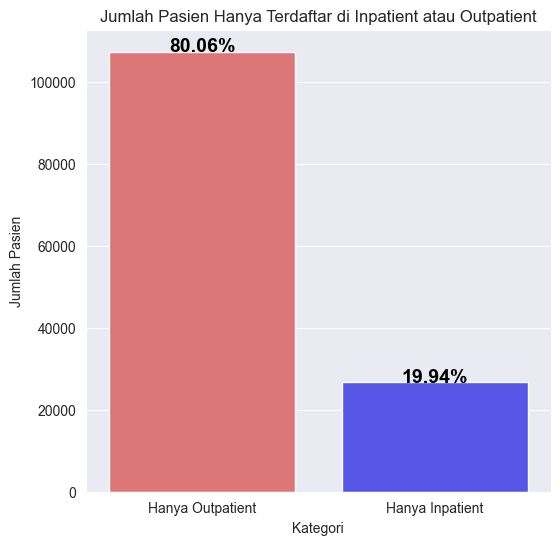

In [14]:
# Hitung persentase pasien hanya di outpatient dan inpatient
outp_only_perc = round((len(outp_only)/total_patients)*100, 2)
inp_only_perc = round((len(inp_only)/total_patients)*100, 2)

# Buat data untuk plot
data = {
    'Category': ['Hanya Outpatient', 'Hanya Inpatient'],
    'Count': [len(outp_only), len(inp_only)],
    'Percentage': [outp_only_perc, inp_only_perc]
}
# Buat plot dengan Seaborn dan Matplotlib
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='Category', y='Count', data=data, palette=['#EE6666', '#3F3FFF'])
plt.title('Jumlah Pasien Hanya Terdaftar di Inpatient atau Outpatient')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pasien')

# Tambahkan label pada setiap bar
for i, v in enumerate(data['Count']):
    ax.text(i, v, f"{data['Percentage'][i]}%", color='black', fontweight='bold', ha='center', fontsize=14)

plt.show()

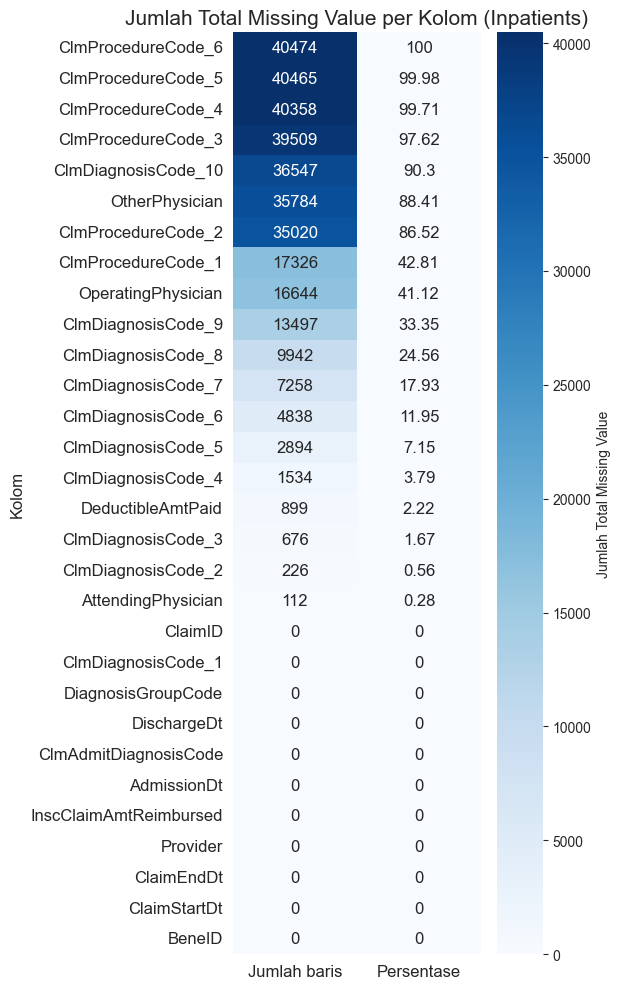

In [15]:
# Hitung jumlah missing value per kolom
missing_count_in = data_inp.isnull().sum()
# Hitung persentase missing value per kolom
missing_perc_in = round((missing_count_in / len(data_inp)) * 100,2)
# Gabungkan kedua series menjadi dataframe
missing_df_in = pd.concat([missing_count_in, missing_perc_in], axis=1, keys=['Jumlah baris', 'Persentase'])
# Sort nilai Jumlah baris secara descending
missing_df_in = missing_df_in.sort_values(by='Jumlah baris', ascending=False)
# Buat label untuk setiap kolom
labels_in = [f"{int(count)} ({perc:.2f}%)" for count, perc in zip(missing_df_in['Jumlah baris'], missing_df_in['Persentase'])]

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(6,10))
sns.heatmap(missing_df_in, annot=True, fmt='g', cmap='Blues', annot_kws={'fontsize': 12}, cbar_kws={'label': 'Jumlah Total Missing Value'})
plt.title('Jumlah Total Missing Value per Kolom (Inpatients)', fontsize=15)
plt.xlabel('')
plt.ylabel('Kolom', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

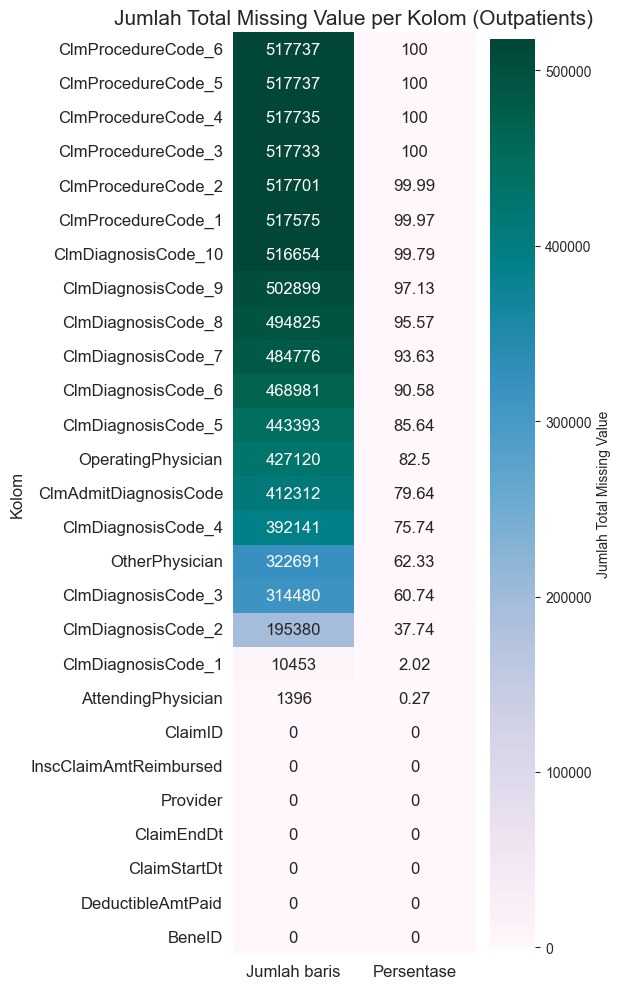

In [16]:
# Hitung jumlah missing value per kolom
missing_count_out = data_outp.isnull().sum()
# Hitung persentase missing value per kolom
missing_perc_out = round((missing_count_out / len(data_outp)) * 100,2)
# Gabungkan kedua series menjadi dataframe
missing_df_out = pd.concat([missing_count_out, missing_perc_out], axis=1, keys=['Jumlah baris', 'Persentase'])
# Sort nilai Jumlah baris secara descending
missing_df_out = missing_df_out.sort_values(by='Jumlah baris', ascending=False)
# Buat label untuk setiap kolom
labels_out = [f"{int(count)} ({perc:.2f}%)" for count, perc in zip(missing_df_out['Jumlah baris'], missing_df_out['Persentase'])]

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(6,10))
sns.heatmap(missing_df_out, annot=True, fmt='g', cmap='PuBuGn', annot_kws={'fontsize': 12}, cbar_kws={'label': 'Jumlah Total Missing Value'})
plt.title('Jumlah Total Missing Value per Kolom (Outpatients)', fontsize=15)
plt.xlabel('')
plt.ylabel('Kolom', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

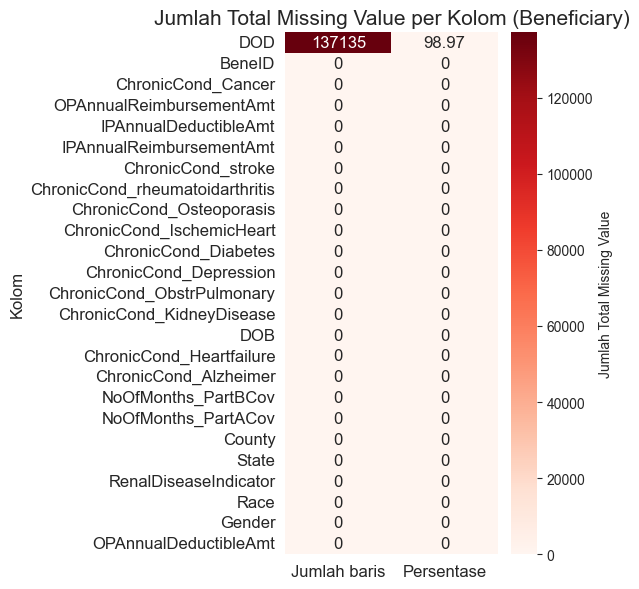

In [17]:
# Hitung jumlah missing value per kolom
missing_count_ben = data_benef.isnull().sum()
# Hitung persentase missing value per kolom
missing_perc_ben = round((missing_count_ben / len(data_benef)) * 100,2)
# Gabungkan kedua series menjadi dataframe
missing_df_ben = pd.concat([missing_count_ben, missing_perc_ben], axis=1, keys=['Jumlah baris', 'Persentase'])
# Sort nilai Jumlah baris secara descending
missing_df_ben = missing_df_ben.sort_values(by='Jumlah baris', ascending=False)
# Buat label untuk setiap kolom
labels_ben = [f"{int(count)} ({perc:.2f}%)" for count, perc in zip(missing_df_ben['Jumlah baris'], missing_df_ben['Persentase'])]

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(6,6))
sns.heatmap(missing_df_ben, annot=True, fmt='g', cmap='Reds', annot_kws={'fontsize': 12}, cbar_kws={'label': 'Jumlah Total Missing Value'})
plt.title('Jumlah Total Missing Value per Kolom (Beneficiary)', fontsize=15)
plt.xlabel('')
plt.ylabel('Kolom', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

### Merging Tables

In [18]:
# Feature Engineering: Membuat kolom baru "admitted"
data_inp['admitted'] = 1
data_outp['admitted'] = 0

In [19]:
# Menggabungkan semua dataset
data_raw = pd.concat([data_outp, data_inp], ignore_index=True)
data_raw = pd.merge(data_raw, data_benef, on='BeneID')
data_raw = pd.merge(data_raw, data_label, on='Provider')

In [20]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [21]:
data_raw.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,admitted,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,0,NaN,NaN,NaN,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,0,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes


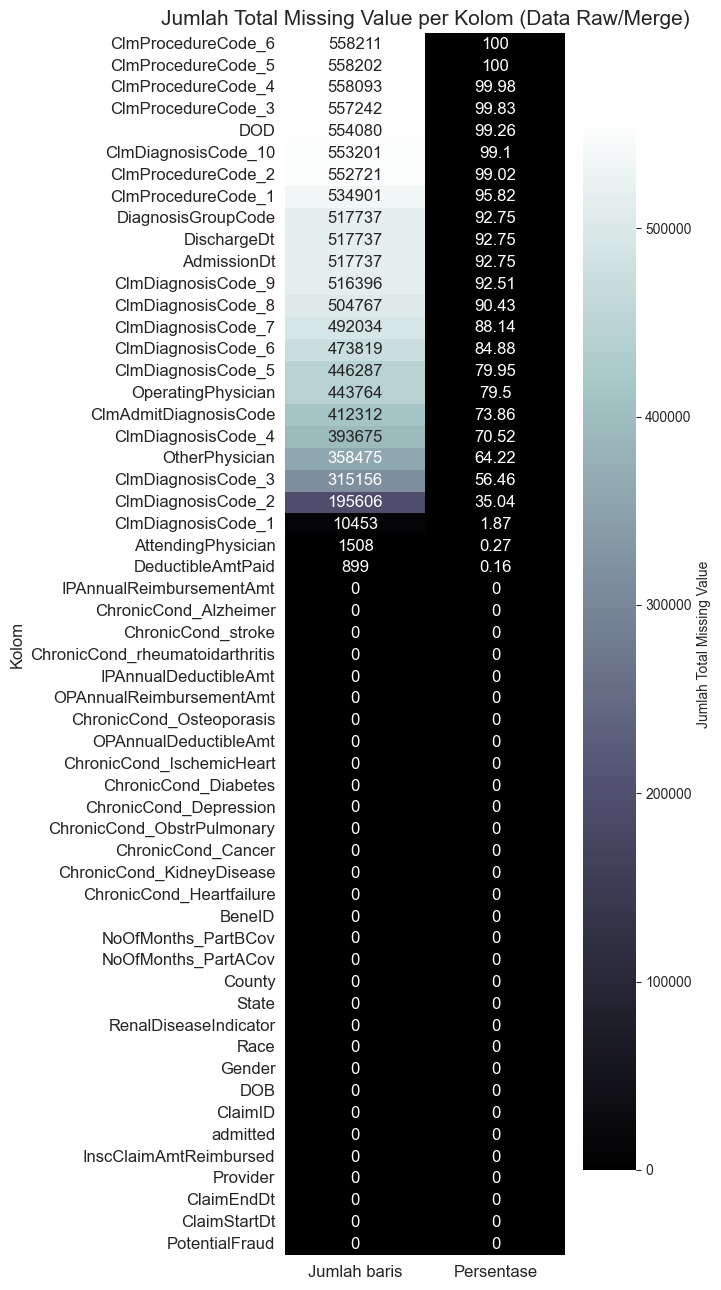

In [22]:
# Hitung jumlah missing value per kolom
missing_count = data_raw.isnull().sum()
# Hitung persentase missing value per kolom
missing_perc = round((missing_count / len(data_raw)) * 100,2)
# Gabungkan kedua series menjadi dataframe
missing_df = pd.concat([missing_count, missing_perc], axis=1, keys=['Jumlah baris', 'Persentase'])
# Sort nilai Jumlah baris secara descending
missing_df = missing_df.sort_values(by='Jumlah baris', ascending=False)
# Buat label untuk setiap kolom
labels = [f"{int(count)} ({perc:.2f}%)" for count, perc in zip(missing_df['Jumlah baris'], missing_df['Persentase'])]

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(7,13))
sns.heatmap(missing_df, annot=True, fmt='g', cmap='bone', annot_kws={'fontsize': 12}, cbar_kws={'label': 'Jumlah Total Missing Value'})
plt.title('Jumlah Total Missing Value per Kolom (Data Raw/Merge)', fontsize=15)
plt.xlabel('')
plt.ylabel('Kolom', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

In [23]:
data_raw.nunique()

BeneID                             138556
ClaimID                            558211
ClaimStartDt                          398
ClaimEndDt                            366
Provider                             5410
InscClaimAmtReimbursed                438
AttendingPhysician                  82063
OperatingPhysician                  35315
OtherPhysician                      46457
ClmDiagnosisCode_1                  10450
ClmDiagnosisCode_2                   5300
ClmDiagnosisCode_3                   4756
ClmDiagnosisCode_4                   4359
ClmDiagnosisCode_5                   3970
ClmDiagnosisCode_6                   3607
ClmDiagnosisCode_7                   3388
ClmDiagnosisCode_8                   3070
ClmDiagnosisCode_9                   2774
ClmDiagnosisCode_10                  1158
ClmProcedureCode_1                   1117
ClmProcedureCode_2                    300
ClmProcedureCode_3                    154
ClmProcedureCode_4                     48
ClmProcedureCode_5                

In [24]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,558211.0,997.012133,3821.534891,0.0,40.00,80.0,300.0,125000.0
ClmProcedureCode_1,23310.0,5896.154612,3050.489933,11.0,3848.00,5363.0,8669.0,9999.0
ClmProcedureCode_2,5490.0,4106.358106,2031.640878,42.0,2724.00,4019.0,4439.0,9999.0
ClmProcedureCode_3,969.0,4221.123839,2281.849885,42.0,2724.00,4019.0,5185.0,9999.0
ClmProcedureCode_4,118.0,4070.262712,2037.626990,42.0,2754.25,4019.0,4439.0,9986.0
ClmProcedureCode_5,9.0,5269.444444,2780.071632,2724.0,4139.00,4139.0,5185.0,9982.0
ClmProcedureCode_6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeductibleAmtPaid,557312.0,78.421085,274.016812,0.0,0.00,0.0,0.0,1068.0
admitted,558211.0,0.072507,0.259325,0.0,0.00,0.0,0.0,1.0
Gender,558211.0,1.578838,0.493746,1.0,1.00,2.0,2.0,2.0


## Feature Engineering (1)

In [25]:
data_pre1 = data_raw.copy()

### Feature Engineering

In [26]:
data_pre1['ClaimStartDt'] = pd.to_datetime(data_pre1['ClaimStartDt'], format='%Y-%m-%d')
data_pre1['ClaimEndDt'] = pd.to_datetime(data_pre1['ClaimEndDt'], format='%Y-%m-%d')
data_pre1['DOB'] = pd.to_datetime(data_pre1['DOB'], format='%Y-%m-%d')
data_pre1['DOD'] = pd.to_datetime(data_pre1['DOD'], format='%Y-%m-%d')
data_pre1['AdmissionDt'] = pd.to_datetime(data_pre1['AdmissionDt'], format='%Y-%m-%d')
data_pre1['DischargeDt'] = pd.to_datetime(data_pre1['DischargeDt'], format='%Y-%m-%d')

In [27]:
earliest_start_date = data_pre1['ClaimStartDt'].min()
latest_start_date = data_pre1['ClaimStartDt'].max()
earliest_end_date = data_pre1['ClaimEndDt'].min()
latest_end_date = data_pre1['ClaimEndDt'].max()
earliest_Admission_date = data_pre1['AdmissionDt'].min()
latest_Admission_date = data_pre1['AdmissionDt'].max()
earliest_Discharge_date = data_pre1['DischargeDt'].min()
latest_Discharge_date = data_pre1['DischargeDt'].max()

print("ClaimStartDt - Tanggal Paling Awal:", earliest_start_date)
print("ClaimStartDt - Tanggal Paling Akhir:", latest_start_date)
print("ClaimEndDt - Tanggal Paling Awal:", earliest_end_date)
print("ClaimEndDt - Tanggal Paling Akhir:", latest_end_date)
print("AdmissionDt - Tanggal Paling Awal:", earliest_Admission_date)
print("AdmissionDt - Tanggal Paling Akhir:", latest_Admission_date)
print("DischargeDt - Tanggal Paling Awal:", earliest_Discharge_date)
print("DischargeDt - Tanggal Paling Akhir:", latest_Discharge_date)

ClaimStartDt - Tanggal Paling Awal: 2008-11-27 00:00:00
ClaimStartDt - Tanggal Paling Akhir: 2009-12-31 00:00:00
ClaimEndDt - Tanggal Paling Awal: 2008-12-28 00:00:00
ClaimEndDt - Tanggal Paling Akhir: 2009-12-31 00:00:00
AdmissionDt - Tanggal Paling Awal: 2008-11-27 00:00:00
AdmissionDt - Tanggal Paling Akhir: 2009-12-31 00:00:00
DischargeDt - Tanggal Paling Awal: 2009-01-01 00:00:00
DischargeDt - Tanggal Paling Akhir: 2009-12-31 00:00:00


#### Creating new Features

##### Age

In [28]:
data_pre1['Age'] = (data_pre1['ClaimStartDt'] - data_pre1['DOB']).astype('<m8[Y]')

##### IsAlive

In [29]:
data_pre1['IsAlive'] = np.where(data_pre1['DOD'].isnull(), 1, 0)

##### AgeGroup

In [30]:
bins = [0, 18, 35, 60, 120]
labels = ['Children', 'Young Adults', 'Adults', 'Elderly']
data_pre1['AgeGroup'] = pd.cut(data_pre1['Age'], bins=bins, labels=labels)

##### ClaimDuration

In [31]:
data_pre1['ClaimDuration'] = (data_pre1['ClaimEndDt'] - data_pre1['ClaimStartDt']).dt.days

##### AdmissionDuration

In [32]:
data_pre1['AdmissionDuration'] = (data_pre1['DischargeDt'] - data_pre1['AdmissionDt']).dt.days

##### TotalDiagnoses

In [33]:
diagnosis_columns = ['ClmDiagnosisCode_{}'.format(i) for i in range(1, 11)]
data_pre1['TotalDiagnoses'] = data_pre1[diagnosis_columns].count(axis=1)

##### TotalProcedures

In [34]:
procedure_columns = ['ClmProcedureCode_{}'.format(i) for i in range(1, 7)]
data_pre1['TotalProcedures'] = data_pre1[procedure_columns].count(axis=1)


##### TotalReimbursement

In [35]:
reimbursement_columns = ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']
data_pre1['TotalReimbursement'] = data_pre1[reimbursement_columns].sum(axis=1)

##### TotalCharge

In [36]:
charge_columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualDeductibleAmt']
data_pre1['TotalCharge'] = data_pre1[charge_columns].sum(axis=1)

##### AvgChargePerDiagnosis

In [37]:
data_pre1['AvgChargePerDiagnosis'] = data_pre1['TotalCharge'] / data_pre1['TotalDiagnoses']

## Exploratory Data

#### Distribusi Potensi Penipuan

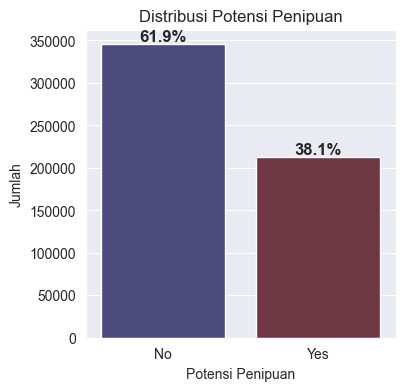

In [38]:
fraud_counts = data_pre1['PotentialFraud'].value_counts()
plt.figure(figsize=(4, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='icefire')
plt.title('Distribusi Potensi Penipuan')
plt.xlabel('Potensi Penipuan')
plt.ylabel('Jumlah')
# Menambahkan label persentase di setiap barnya
total = len(data_pre1['PotentialFraud'])
for i, count in enumerate(fraud_counts.values):
    percentage = (count / total) * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

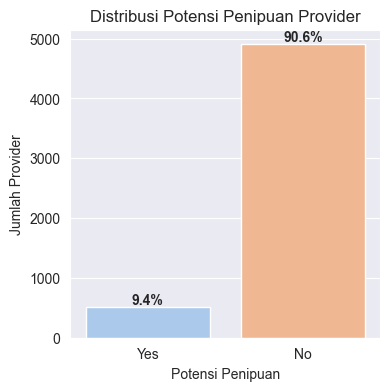

In [39]:
# Menghitung jumlah provider dengan potensi penipuan dan tidak
fraud_counts = data_raw[data_raw['PotentialFraud'] == 'Yes']['Provider'].nunique()
non_fraud_counts = data_raw[data_raw['PotentialFraud'] == 'No']['Provider'].nunique()

# Menghitung persentase jumlah provider dengan potensi penipuan dan tidak
total_providers = data_raw['Provider'].nunique()
fraud_percentage = fraud_counts / total_providers
non_fraud_percentage = non_fraud_counts / total_providers

# Mengatur palet warna pastel
colors = sns.color_palette('pastel')

# Membuat plot menggunakan seaborn
plt.figure(figsize=(4, 4))
sns.barplot(x=['Yes', 'No'], y=[fraud_counts, non_fraud_counts], palette=colors)
plt.title('Distribusi Potensi Penipuan Provider')
plt.xlabel('Potensi Penipuan')
plt.ylabel('Jumlah Provider')

# Menambahkan label persentase di setiap barnya
plt.text(0, fraud_counts, f'{fraud_percentage:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.text(1, non_fraud_counts, f'{non_fraud_percentage:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


In [40]:
# Menghitung jumlah provider dengan potensi penipuan
fraud_provider_counts = data_pre1[data_pre1['PotentialFraud'] == 'Yes']['Provider'].value_counts()

# Membuat DataFrame dari hasil perhitungan
fraud_provider_table = pd.DataFrame(fraud_provider_counts)
fraud_provider_table.columns = ['Jumlah Potensi Penipuan']
fraud_provider_table.index.name = 'Provider'
fraud_provider_table.reset_index(inplace=True)
# Mengurutkan tabel berdasarkan jumlah penipuan secara menurun
fraud_provider_table.sort_values(by='Jumlah Potensi Penipuan', ascending=False, inplace=True)
# Menampilkan tabel
fraud_provider_table.head(10)

,Provider,Jumlah Potensi Penipuan
0,PRV51459,8240
1,PRV53797,4739
2,PRV51574,4444
3,PRV53918,3588
4,PRV54895,3436
5,PRV55215,3393
6,PRV52064,2844
7,PRV56011,2833
8,PRV55004,2399
9,PRV57306,2315


Berdasarkan data yang dianalisis, terdapat **5410 provider** yang memiliki potensi penipuan dalam dataset. Mayoritas dari provider-provider ini, sebanyak **90.6%**, terindikasi memiliki potensi penipuan (Yes), sedangkan **9.4%** lainnya tidak (No). Dalam daftar sepuluh provider dengan **jumlah record potensi penipuan terbanyak**, terdapat provider seperti PRV51459, PRV53797, PRV51574, dan lainnya. Namun, penting untuk diingat bahwa **`jumlah potensi penipuan tidak langsung mengindikasikan bahwa seluruh record atau klaim dari provider tersebut merupakan penipuan`**.
<br>
<br>Dalam kondisi ini, asumsi yang dapat diambil adalah bahwa **`provider-provider tersebut memiliki jumlah kasus yang dicurigai penipuan yang lebih tinggi dibandingkan dengan provider lainnya`**. Namun, perlu dilakukan analisis lebih lanjut dan investigasi mendalam untuk memastikan apakah seluruh record dari provider-provider tersebut benar-benar terkait dengan penipuan atau terdapat faktor lain yang mempengaruhi jumlah potensi penipuan yang tinggi, perlu dilakukan investigasi lebih lanjut dan pemeriksaan detail terhadap rekam medis dan transaksi masing-masing provider untuk memastikan keabsahan dari dugaan penipuan tersebut.

#### Distribusi Potensi Penipuan pada Pasien Rawat Inap dan Jalan

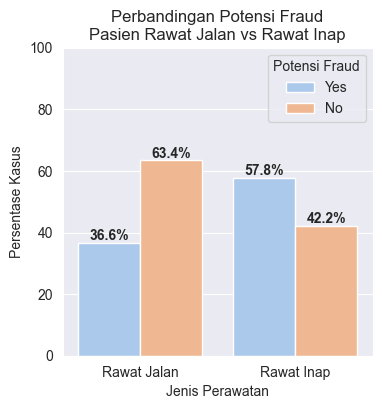

In [41]:
# Membuat subset data untuk pasien rawat jalan/rawat inap
outpatient_data = data_pre1[data_pre1['admitted'] == 0]
inpatient_data = data_pre1[data_pre1['admitted'] == 1]

# Menghitung jumlah kasus potensi Fraud pada pasien rawat jalan dan rawat inap
outpatient_fraud_count = outpatient_data['PotentialFraud'].value_counts().sort_index()
inpatient_fraud_count = inpatient_data['PotentialFraud'].value_counts().sort_index()

# Menghitung persentase potensi penipuan pada pasien rawat jalan dan rawat inap
outpatient_fraud_percentage = outpatient_fraud_count / outpatient_fraud_count.sum() * 100
inpatient_fraud_percentage = inpatient_fraud_count / inpatient_fraud_count.sum() * 100

# Menggabungkan data persentase menjadi dataframe
df_plot = pd.DataFrame({
    'Jenis Perawatan': ['Rawat Jalan', 'Rawat Inap'],
    'Yes': [outpatient_fraud_percentage['Yes'], inpatient_fraud_percentage['Yes']],
    'No': [outpatient_fraud_percentage['No'], inpatient_fraud_percentage['No']]
})

# Melt dataframe untuk membuat plot stacked bar
df_plot_melted = df_plot.melt(id_vars='Jenis Perawatan', var_name='Potensi Fraud', value_name='Persentase')

# Membuat plot stacked bar dengan label persentase
plt.figure(figsize=(4, 4))
g = sns.barplot(x='Jenis Perawatan', y='Persentase', hue='Potensi Fraud', data=df_plot_melted, palette='pastel')
g.set_ylim(0, 100)

# Menambahkan label persentase di setiap stack
for p in g.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + p.get_width() / 2
    txt_y = p.get_height()
    g.text(txt_x, txt_y, txt, ha='center', va='bottom', fontweight='bold')

plt.title('Perbandingan Potensi Fraud\nPasien Rawat Jalan vs Rawat Inap')
plt.xlabel('Jenis Perawatan')
plt.ylabel('Persentase Kasus')
plt.legend(title='Potensi Fraud')

plt.show()

Terlihat bahwa **persentase penipuan pada pasien rawat inap (57.8% Yes) cenderung lebih tinggi** dibandingkan dengan pasien rawat jalan (36.6% Yes). Hal ini menunjukkan adanya potensi penipuan yang lebih tinggi pada pasien yang menjalani rawat inap.

#### Potensi Fraud Berdasarkan Kelompok Usia

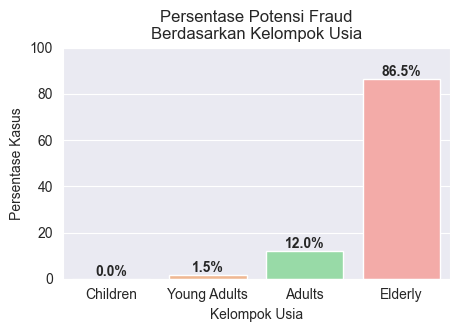

In [42]:
# Menghitung jumlah kasus potensi fraud pada setiap kelompok usia
agegroup_fraud_count = data_pre1['AgeGroup'].loc[data_pre1['PotentialFraud'] == 'Yes'].value_counts().sort_index()

# Menghitung persentase potensi fraud pada setiap kelompok usia
agegroup_fraud_percentage = agegroup_fraud_count / agegroup_fraud_count.sum() * 100

# Membuat dataframe untuk plot
df_plot_agegroup = pd.DataFrame({
    'AgeGroup': agegroup_fraud_percentage.index,
    'Persentase': agegroup_fraud_percentage.values
})

# Membuat plot bar
plt.figure(figsize=(5,3))
g = sns.barplot(x='AgeGroup', y='Persentase', data=df_plot_agegroup, palette='pastel')
g.set_ylim(0, 100)

# Menambahkan label persentase di setiap bar
for p in g.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + p.get_width() / 2
    txt_y = p.get_height()
    g.text(txt_x, txt_y, txt, ha='center', va='bottom', fontweight='bold')

plt.title('Persentase Potensi Fraud\nBerdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Persentase Kasus')

plt.show()

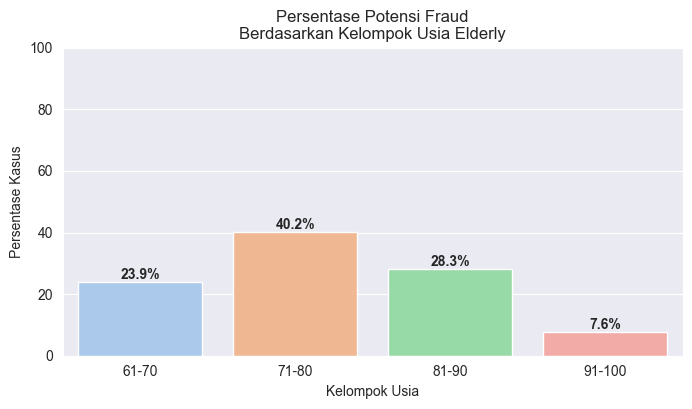

In [43]:
# Filter data untuk kelompok usia 'Elderly'
elderly_data = data_pre1[data_pre1['AgeGroup'] == 'Elderly']

# Membuat bins untuk kelompok usia 'Elderly'
bins = [60,70,80,90,100]
labels = ['61-70', '71-80', '81-90', '91-100']

# Menambahkan kolom 'AgeGroupLabel' berdasarkan bins dan labels
elderly_data['AgeGroupLabel'] = pd.cut(elderly_data['Age'], bins=bins, labels=labels, right=False)

# Menghitung jumlah kasus potensi fraud pada kelompok usia 'Elderly'
fraud_count = elderly_data['AgeGroupLabel'].loc[elderly_data['PotentialFraud'] == 'Yes'].value_counts().sort_index()

# Menghitung persentase potensi fraud pada kelompok usia 'Elderly'
fraud_percentage = fraud_count / fraud_count.sum() * 100

# Membuat dataframe untuk plot
df_plot_elderly = pd.DataFrame({
    'AgeGroupLabel': fraud_percentage.index,
    'Persentase': fraud_percentage.values
})

# Mengurutkan data berdasarkan AgeGroupLabel
df_plot_elderly = df_plot_elderly.sort_values('AgeGroupLabel')

# Membuat plot bar
plt.figure(figsize=(8, 4))
g = sns.barplot(x='AgeGroupLabel', y='Persentase', data=df_plot_elderly, palette='pastel')
g.set_ylim(0, 100)

# Menambahkan label persentase di setiap bar
for p in g.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + p.get_width() / 2
    txt_y = p.get_height()
    g.text(txt_x, txt_y, txt, ha='center', va='bottom', fontweight='bold')

plt.title('Persentase Potensi Fraud\nBerdasarkan Kelompok Usia Elderly')
plt.xlabel('Kelompok Usia')
plt.ylabel('Persentase Kasus')

plt.show()

Berdasarkan analisis di atas, ditemukan beberapa insight terkait potensi fraud berdasarkan kelompok usia:
<br>
<br>
1. Kelompok usia "Elderly (>60 Tahun)":
<br>Kelompok usia "Elderly" memiliki persentase potensi fraud yang sangat signifikan, yaitu sebesar 86.5%.
Hal ini menunjukkan bahwa kelompok usia "Elderly" cenderung lebih rentan terhadap potensi fraud dibandingkan dengan kelompok usia lainnya.
Penting untuk melakukan pengawasan dan pemantauan yang lebih ketat terhadap klaim atau layanan kesehatan yang melibatkan kelompok usia "Elderly" guna mencegah adanya potensi fraud.
2. Kelompok usia "Adults":
<br>
Kelompok usia "Adults" memiliki persentase potensi fraud sebesar 12.0%.
Meskipun persentasenya lebih rendah dibandingkan dengan kelompok usia "Elderly", tetap perlu diperhatikan adanya potensi fraud dalam kelompok usia ini.
Pengawasan yang efektif terhadap klaim dan layanan kesehatan pada kelompok usia "Adults" juga penting untuk mencegah potensi fraud.
3. Kelompok usia "Young-Adults":
<br>
Kelompok usia "Young-Adults" memiliki persentase potensi fraud yang lebih rendah, yaitu sebesar 1.5%.
Meskipun persentasenya rendah, tetap perlu diperhatikan dan dilakukan pemantauan terhadap klaim atau layanan kesehatan pada kelompok usia ini.
</br>
</br>
Perlu dicatat bahwa pada dataset ini tidak ada pasien yang berusia di bawah 18 tahun yang terdeteksi memiliki potensi fraud. Hal ini menunjukkan bahwa potensi fraud cenderung lebih dominan pada kelompok usia yang lebih tua.

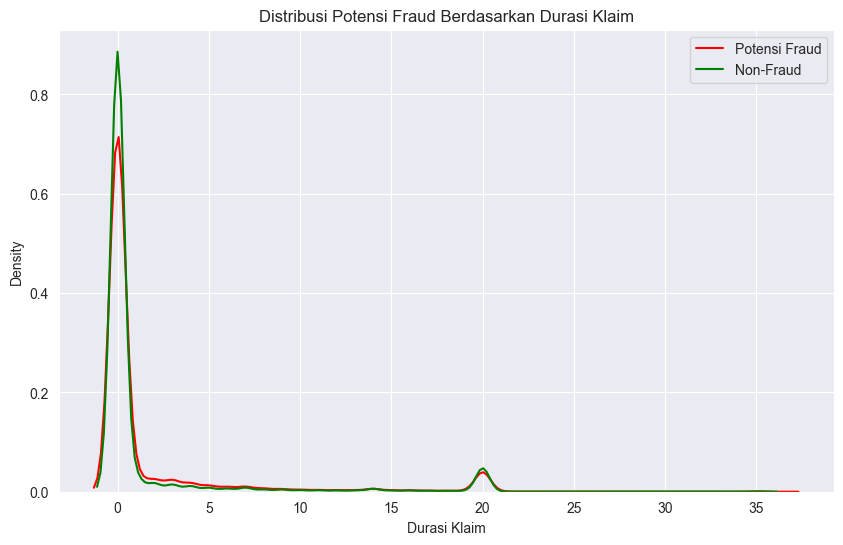

In [44]:
plt.figure(figsize=(10, 6))

# Filter data potensi fraud
fraud_data = data_pre1[data_pre1['PotentialFraud'] == 'Yes']
non_fraud_data = data_pre1[data_pre1['PotentialFraud'] == 'No']

# Plot KDE plot untuk potensi fraud
sns.kdeplot(x=fraud_data['ClaimDuration'], color='red', label='Potensi Fraud')

# Plot KDE plot untuk non-fraud
sns.kdeplot(x=non_fraud_data['ClaimDuration'], color='green', label='Non-Fraud')

plt.title('Distribusi Potensi Fraud Berdasarkan Durasi Klaim')
plt.xlabel('Durasi Klaim')
plt.ylabel('Density')

plt.legend()
plt.show()


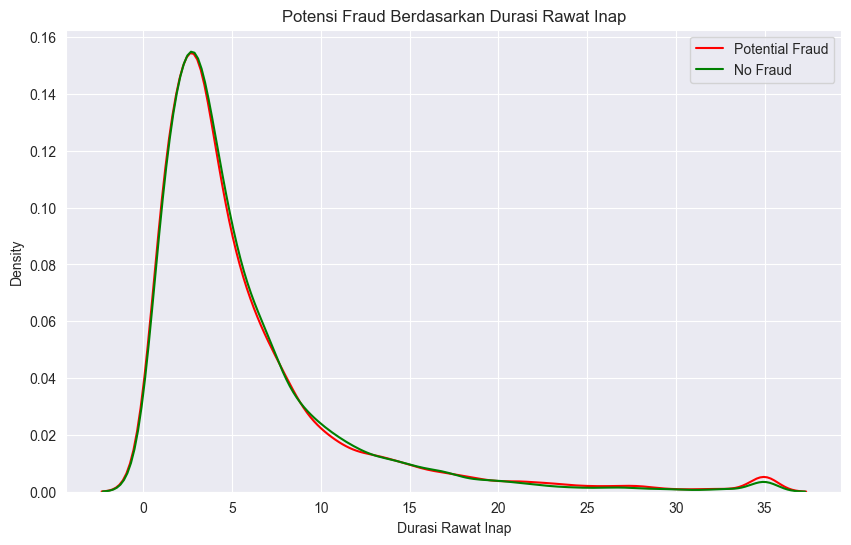

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_pre1[data_pre1['PotentialFraud'] == 'Yes']['AdmissionDuration'], color='red', label='Potential Fraud')
sns.kdeplot(data_pre1[data_pre1['PotentialFraud'] == 'No']['AdmissionDuration'], color='green', label='No Fraud')

plt.title('Potensi Fraud Berdasarkan Durasi Rawat Inap')
plt.xlabel('Durasi Rawat Inap')
plt.ylabel('Density')
plt.legend()

plt.show()

Garis KDE untuk potensi fraud (merah) dan non-fraud (hijau) memiliki tren yang kurang lebih sama, artinya distribusi durasi klaim/durasi inap pada kedua kelompok tersebut relatif serupa. Hal ini bisa mengindikasikan bahwa durasi klaim dan durasi Inap tidak menjadi faktor yang signifikan dalam membedakan antara kasus potensi fraud dan non-fraud.

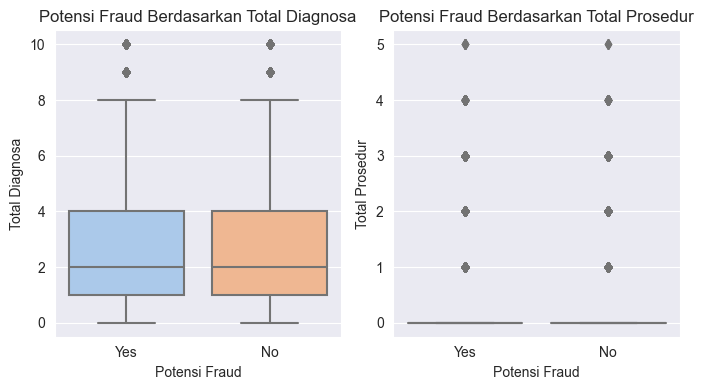

In [46]:
plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='PotentialFraud', y='TotalDiagnoses', data=data_pre1, palette='pastel')
plt.title('Potensi Fraud Berdasarkan Total Diagnosa')
plt.xlabel('Potensi Fraud')
plt.ylabel('Total Diagnosa')

plt.subplot(1, 2, 2)
sns.boxplot(x='PotentialFraud', y='TotalProcedures', data=data_pre1, palette='pastel')
plt.title('Potensi Fraud Berdasarkan Total Prosedur')
plt.xlabel('Potensi Fraud')
plt.ylabel('Total Prosedur')

plt.tight_layout()
plt.show()

1. Total Diagnosa:
    - Terdapat nilai outliers pada angka 9 dan 10 di kedua kelompok "Potensi Fraud: Yes" dan "Potensi Fraud: No". Hal ini menunjukkan bahwa ada beberapa kasus yang memiliki jumlah diagnosa yang jauh lebih tinggi dibandingkan dengan nilai median dan quartil atas.
    - Median di kedua kelompok "Potensi Fraud: Yes" dan "Potensi Fraud: No" berada di sekitar angka 2, yang menunjukkan bahwa sebagian besar kasus memiliki jumlah diagnosa yang relatif rendah.
    - Tidak terdapat perbedaan yang signifikan antara distribusi jumlah diagnosa pada kedua kelompok. Hal ini menunjukkan bahwa fitur ini tidak memiliki pengaruh yang signifikan dalam memprediksi potensi fraud.
2. Total Prosedur:
    - Terdapat beberapa nilai outliers pada angka 1, 2, 3, 4, dan 5 di kedua kelompok "Potensi Fraud: Yes" dan "Potensi Fraud: No". Hal ini menunjukkan bahwa ada beberapa kasus yang memiliki jumlah prosedur yang jauh lebih tinggi dibandingkan dengan nilai median dan quartil atas.
    - Median di kedua kelompok "Potensi Fraud: Yes" dan "Potensi Fraud: No" berada di sekitar angka 0, yang menunjukkan bahwa sebagian besar kasus memiliki jumlah prosedur yang relatif rendah atau bahkan tidak ada prosedur yang dilakukan.
    - Tidak terdapat perbedaan yang signifikan antara distribusi jumlah prosedur pada kedua kelompok. Hal ini menunjukkan bahwa fitur ini juga tidak memiliki pengaruh yang signifikan dalam memprediksi potensi fraud.
<br>
<br>
3. Secara keseluruhan, kedua fitur "Total Diagnosa" dan "Total Prosedur" tidak memberikan insight yang kuat dalam memprediksi potensi fraud.

## Cleaning, Preprocessing

#### Missing Values

In [47]:
check_missing = data_pre1.isnull().sum() * 100 / data_pre1.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

ClmProcedureCode_6       100.000000
ClmProcedureCode_5        99.998388
ClmProcedureCode_4        99.978861
ClmProcedureCode_3        99.826410
DOD                       99.259957
ClmDiagnosisCode_10       99.102490
ClmProcedureCode_2        99.016501
ClmProcedureCode_1        95.824160
AdmissionDuration         92.749337
AdmissionDt               92.749337
DischargeDt               92.749337
DiagnosisGroupCode        92.749337
ClmDiagnosisCode_9        92.509105
ClmDiagnosisCode_8        90.425843
ClmDiagnosisCode_7        88.144805
ClmDiagnosisCode_6        84.881702
ClmDiagnosisCode_5        79.949517
OperatingPhysician        79.497538
ClmAdmitDiagnosisCode     73.863109
ClmDiagnosisCode_4        70.524407
OtherPhysician            64.218548
ClmDiagnosisCode_3        56.458221
ClmDiagnosisCode_2        35.041588
ClmDiagnosisCode_1         1.872589
AttendingPhysician         0.270149
DeductibleAmtPaid          0.161050
AvgChargePerDiagnosis      0.051414
dtype: float64

In [48]:
data_pre2 = data_pre1.copy()

In [49]:
# Drop Kolom Code karena tidak relevan untuk prediksi dan memiliki missing value yang banyak
code_columns = [col for col in data_pre2.columns if 'Code' in col]
data_pre2.drop(columns=code_columns, inplace=True)

In [50]:
cols_to_drop = [
    # identifikasi unik
    'BeneID',
    'ClaimID',
    # datetime
    'ClaimStartDt',
    'ClaimEndDt',
    'DOB',
    'DOD',
    'AdmissionDt',
    'DischargeDt',
    # Tidak Relevan
    'OperatingPhysician',
    'OtherPhysician',
    'County',
    'State',
    'AvgChargePerDiagnosis'
]

In [51]:
data_pre2 = data_pre2.drop(cols_to_drop, axis=1)

In [52]:
check_missing = data_pre2.isnull().sum() * 100 / data_pre2.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

AdmissionDuration     92.749337
AttendingPhysician     0.270149
DeductibleAmtPaid      0.161050
dtype: float64

In [53]:
data_pre2['AdmissionDuration'].fillna(0, inplace=True)
data_pre2['AttendingPhysician'].fillna(0, inplace=True)
data_pre2['DeductibleAmtPaid'].fillna(0, inplace=True)

#### Encoding

In [54]:
categorical_cols = [col for col in data_pre2.select_dtypes(include='object').columns.tolist()]
categorical_cols

['Provider', 'AttendingPhysician', 'RenalDiseaseIndicator', 'PotentialFraud']

Kolom "Provider" dan "AttendingPhysician" dipertahankan karena keduanya dapat memberikan informasi yang relevan dalam analisis fraud. Meskipun kardinalitas tinggi pada kolom "AttendingPhysician" bisa menjadi tantangan dalam beberapa metode encoding, seperti one-hot encoding, namun dengan menggunakan target encoding, kita dapat mengatasi masalah tersebut dengan memperhitungkan hubungan antara dokter yang merawat dengan kejadian fraud. Hal ini memungkinkan model untuk mempelajari pola dan tren yang spesifik terkait dengan setiap dokter, sehingga meningkatkan kemampuan model dalam mendeteksi kasus fraud yang melibatkan dokter-dokter tertentu.
<br>
<br>
Target encoding adalah pendekatan di mana setiap nilai pada suatu kolom kategori digantikan dengan statistik target pada dataset, seperti rasio kasus fraud. Dalam konteks ini, pada kolom "AttendingPhysician", setiap dokter akan digantikan dengan proporsi kasus fraud yang terkait dengan dokter tersebut. Misalnya, jika seorang dokter terlibat dalam 10% kasus fraud, nilai pada kolom "AttendingPhysician" untuk dokter tersebut akan diganti dengan 0.1. Pendekatan ini membantu model untuk mempelajari hubungan antara dokter tertentu dengan kejadian fraud, sehingga meningkatkan kemampuan model dalam mengidentifikasi pola dan karakteristik yang terkait dengan kasus fraud.

In [55]:
data_pre3 = data_pre2.copy()

In [56]:
# Mapping 'PotentialFraud' menjadi 'Yes': 1, 'No': 0
data_pre3['PotentialFraud'] = data_pre3['PotentialFraud'].map({'Yes': 1, 'No': 0})

In [57]:
# Mapping 'RenalDiseaseIndicator' menjadi 'Y': 1
data_pre3['RenalDiseaseIndicator'] = data_pre3['RenalDiseaseIndicator'].replace('Y', 1)

In [58]:
# Menghitung rasio kasus fraud berdasarkan Provider
provider_fraud_ratio = data_pre3.groupby('Provider')['PotentialFraud'].mean()

# Menghitung rasio kasus fraud berdasarkan AttendingPhysician
physician_fraud_ratio = data_pre3.groupby('AttendingPhysician')['PotentialFraud'].mean()

# Mengganti nilai pada kolom Provider dengan rasio kasus fraud
data_pre3['Provider_TargetEncoded'] = data_pre3['Provider'].map(provider_fraud_ratio)

# Mengganti nilai pada kolom AttendingPhysician dengan rasio kasus fraud
data_pre3['AttendingPhysician_TargetEncoded'] = data_pre3['AttendingPhysician'].map(physician_fraud_ratio)

In [59]:
# One-Hot Encoding
to_onehot = ['Race','Gender']
for onehot in to_onehot:
    onehots = pd.get_dummies(data_pre3[onehot], prefix=onehot)
    data_pre3 = data_pre3.join(onehots)
# Drop feature yang sudah di encode
data_pre3 = data_pre3.drop(columns=to_onehot).copy()

In [60]:
# Daftar kolom 'ChronicCond_...'
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                      'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
data_pre3[chronic_conditions] = data_pre3[chronic_conditions].replace(2, 0)

In [61]:
to_drop_2 =['Provider','AttendingPhysician','AgeGroup']
data_pre4 = data_pre3.drop(to_drop_2, axis=1)

In [62]:
data_pre4.duplicated().sum()

7297

In [63]:
data_pre4.drop_duplicates(keep='first', inplace=True)

#### Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()
scaler.fit(data_pre4)
data_scaled = pd.DataFrame(scaler.transform(data_pre4),columns= data_pre4.columns)

## Pre-Model Testing

#### Correlation

In [66]:
hm = data_scaled.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='ice',
                template='plotly_dark',width=900,height=900)
fig.show()

In [67]:
corr_matrix = data_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

['admitted',
 'OPAnnualDeductibleAmt',
 'TotalReimbursement',
 'TotalCharge',
 'Provider_TargetEncoded',
 'AttendingPhysician_TargetEncoded',
 'Race_2',
 'Gender_2']

In [68]:
data_scaled.drop(to_drop_hicorr, axis=1, inplace=True)

In [69]:
data_scaled['PotentialFraud'].value_counts(normalize=True)*100

0.0    61.807288
1.0    38.192712
Name: PotentialFraud, dtype: float64

#### T-Test

In [70]:
from scipy.stats import ttest_ind

In [71]:
X = data_scaled.drop('PotentialFraud', axis=1)
y = data_scaled['PotentialFraud']

In [72]:
# Membuat dataframe untuk menyimpan hasil t-test
t_test_results = pd.DataFrame(columns=['Feature', 'T-Statistik', 'p-Value'])

# Melakukan t-test pada setiap fitur
for feature in X.columns:
    group1 = X.loc[y == 0, feature]
    group2 = X.loc[y == 1, feature]
    
    # Melakukan t-test independent
    t_stat, p_value = ttest_ind(group1, group2)

    # Memformat nilai t-statistik dan p-value menjadi 2 angka desimal di belakang koma
    t_stat = round(t_stat, 2)
    p_value = round(p_value, 2)
    
    # Menambahkan hasil t-test ke dataframe
    t_test_results = t_test_results.append({'Feature': feature,
                                            'T-Statistik': t_stat,
                                            'p-Value': p_value}, ignore_index=True)

In [73]:
sorted_results = t_test_results.sort_values(by='p-Value', ascending=False)
sorted_results

,Feature,T-Statistik,p-Value
28,Gender_1,-0.19,0.85
10,ChronicCond_Depression,-0.20,0.84
13,ChronicCond_Osteoporasis,-1.00,0.32
20,IsAlive,-1.07,0.28
4,NoOfMonths_PartBCov,-1.40,0.16
18,OPAnnualReimbursementAmt,-1.40,0.16
8,ChronicCond_Cancer,-2.78,0.01
17,IPAnnualDeductibleAmt,-27.24,0.00
27,Race_5,-13.07,0.00
26,Race_3,-21.43,0.00


Uji-t dapat digunakan sebagai gambaran awal untuk mengidentifikasi variabel-variabel yang memiliki pengaruh signifikan terhadap target atau variabel dependen. Namun, penting untuk diingat bahwa uji-t sendiri tidak memberikan informasi tentang seberapa besar pengaruh variabel tersebut terhadap target. Untuk itu, analisis lain seperti SHAP atau metode feature importance lainnya dapat digunakan untuk memperoleh pemahaman yang lebih mendalam tentang pengaruh variabel setelah pemodelan.

## Modeling

### Train-Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((440731, 29), (110183, 29))

### Oversampling

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
from sklearn.model_selection import learning_curve

In [80]:
def eval_classification(model):
    y_pred_train = model.predict(X_train_resampled)
    y_pred_test = model.predict(X_test)
    y_pred_proba_train = model.predict_proba(X_train_resampled)
    y_pred_proba_test = model.predict_proba(X_test)
    strat_k_fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    
    print("Accuracy (Train Set): %.3f" % accuracy_score(y_train_resampled, y_pred_train))
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred_test))
    print("Precision (Train Set): %.3f" % precision_score(y_train_resampled, y_pred_train))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred_test))
    print("Recall (Train Set): %.3f" % recall_score(y_train_resampled, y_pred_train))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred_test))
    print("F1-Score (Train Set): %.3f" % f1_score(y_train_resampled, y_pred_train))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred_test))
    print("roc_auc (train-proba): %.3f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba_test[:, 1]))
    print()
    print('-------CROSS-VALIDATION-------')
    scorings = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    scores = cross_validate(model, X_train_resampled, y_train_resampled, cv=strat_k_fold, scoring=scorings, return_train_score=True)
    
    for scoring in scorings:
        train_score_mean = scores[f'train_{scoring}'].mean()
        test_score_mean = scores[f'test_{scoring}'].mean()
        print(f"{scoring.capitalize()} (Train Set): %.3f" % train_score_mean)
        print(f"{scoring.capitalize()} (Test Set): %.3f" % test_score_mean)

### Tree Based Modeling

In [81]:
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Train Set): 0.534
Accuracy (Test Set): 0.629
Precision (Train Set): 0.695
Precision (Test Set): 0.563
Recall (Train Set): 0.121
Recall (Test Set): 0.117
F1-Score (Train Set): 0.207
F1-Score (Test Set): 0.194
roc_auc (train-proba): 0.545
roc_auc (test-proba): 0.540

-------CROSS-VALIDATION-------
Accuracy (Train Set): 0.563
Accuracy (Test Set): 0.561
Precision (Train Set): 0.737
Precision (Test Set): 0.734
Recall (Train Set): 0.221
Recall (Test Set): 0.219
F1 (Train Set): 0.321
F1 (Test Set): 0.318
Roc_auc (Train Set): 0.602
Roc_auc (Test Set): 0.599


In [82]:
rf = RandomForestClassifier(max_depth=4, random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.530
Accuracy (Test Set): 0.629
Precision (Train Set): 0.691
Precision (Test Set): 0.566
Recall (Train Set): 0.110
Recall (Test Set): 0.109
F1-Score (Train Set): 0.190
F1-Score (Test Set): 0.183
roc_auc (train-proba): 0.546
roc_auc (test-proba): 0.539

-------CROSS-VALIDATION-------
Accuracy (Train Set): 0.574
Accuracy (Test Set): 0.574
Precision (Train Set): 0.734
Precision (Test Set): 0.733
Recall (Train Set): 0.233
Recall (Test Set): 0.233
F1 (Train Set): 0.354
F1 (Test Set): 0.353
Roc_auc (Train Set): 0.614
Roc_auc (Test Set): 0.613


In [83]:
gb = GradientBoostingClassifier(max_depth=4,random_state=42)
gb.fit(X_train, y_train)
eval_classification(gb)

Accuracy (Train Set): 0.533
Accuracy (Test Set): 0.629
Precision (Train Set): 0.699
Precision (Test Set): 0.569
Recall (Train Set): 0.116
Recall (Test Set): 0.113
F1-Score (Train Set): 0.198
F1-Score (Test Set): 0.189
roc_auc (train-proba): 0.569
roc_auc (test-proba): 0.552

-------CROSS-VALIDATION-------
Accuracy (Train Set): 0.686
Accuracy (Test Set): 0.686
Precision (Train Set): 0.878
Precision (Test Set): 0.877
Recall (Train Set): 0.432
Recall (Test Set): 0.432
F1 (Train Set): 0.579
F1 (Test Set): 0.579
Roc_auc (Train Set): 0.710
Roc_auc (Test Set): 0.707


In [85]:
lgb = GradientBoostingClassifier(max_depth=4,random_state=42)
lgb.fit(X_train, y_train)
eval_classification(lgb)

Accuracy (Train Set): 0.533
Accuracy (Test Set): 0.629
Precision (Train Set): 0.699
Precision (Test Set): 0.569
Recall (Train Set): 0.116
Recall (Test Set): 0.113
F1-Score (Train Set): 0.198
F1-Score (Test Set): 0.189
roc_auc (train-proba): 0.569
roc_auc (test-proba): 0.552

-------CROSS-VALIDATION-------
Accuracy (Train Set): 0.686
Accuracy (Test Set): 0.686
Precision (Train Set): 0.878
Precision (Test Set): 0.877
Recall (Train Set): 0.432
Recall (Test Set): 0.432
F1 (Train Set): 0.579
F1 (Test Set): 0.579
Roc_auc (Train Set): 0.710
Roc_auc (Test Set): 0.707


In [84]:
xgb = XGBClassifier(max_depth=4,random_state=42)
xgb.fit(X_train, y_train)
eval_classification(xgb)

Accuracy (Train Set): 0.535
Accuracy (Test Set): 0.630
Precision (Train Set): 0.709
Precision (Test Set): 0.573
Recall (Train Set): 0.121
Recall (Test Set): 0.117
F1-Score (Train Set): 0.206
F1-Score (Test Set): 0.195
roc_auc (train-proba): 0.585
roc_auc (test-proba): 0.566

-------CROSS-VALIDATION-------
Accuracy (Train Set): 0.696
Accuracy (Test Set): 0.694
Precision (Train Set): 0.886
Precision (Test Set): 0.884
Recall (Train Set): 0.449
Recall (Test Set): 0.447
F1 (Train Set): 0.596
F1 (Test Set): 0.594
Roc_auc (Train Set): 0.728
Roc_auc (Test Set): 0.718


#### Hyperparameter XGBoost

In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
strat_k_fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [100, 300, 500],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

# membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=strat_k_fold, n_iter=10, scoring='roc_auc')

# melakukan fit dengan data latih
random_search.fit(X_train_resampled, y_train_resampled)

# mencetak parameter terbaik
print("Parameter terbaik: ", random_search.best_params_)

Parameter terbaik:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.7}


In [127]:
xgb_tuned = XGBClassifier(max_depth= 7,
                          subsample= 0.7,
                          n_estimators= 500,
                          learning_rate= 0.3,
                          colsample_bytree= 0.7,
                          random_state=42)
xgb_tuned.fit(X_train_resampled, y_train_resampled)
eval_classification(xgb_tuned)

Accuracy (Train Set): 0.752
Accuracy (Test Set): 0.642
Precision (Train Set): 0.918
Precision (Test Set): 0.587
Recall (Train Set): 0.553
Recall (Test Set): 0.207
F1-Score (Train Set): 0.690
F1-Score (Test Set): 0.306
roc_auc (train-proba): 0.841
roc_auc (test-proba): 0.620

-------CROSS-VALIDATION-------
Accuracy (Train Set): 0.759
Accuracy (Test Set): 0.707
Precision (Train Set): 0.923
Precision (Test Set): 0.844
Recall (Train Set): 0.565
Recall (Test Set): 0.509
F1 (Train Set): 0.701
F1 (Test Set): 0.635
Roc_auc (Train Set): 0.851
Roc_auc (Test Set): 0.761


#### Confusion Matrix

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [159]:
y_pred_cv = cross_val_predict(xgb, X_train_resampled, y_train_resampled, cv=strat_k_fold)
confusion_matrix_cv = confusion_matrix(y_train_resampled, y_pred_cv)

In [160]:
fig = px.imshow(confusion_matrix_cv, text_auto=".0f", color_continuous_scale='ice',
                template='plotly_dark',width=400,height=400,
                labels={"x": "Actual Fraud", "y": "Predicted Fraud"},
                        x=["Not Fraud", "Fraud"],
                        y=["Not Fraud", "Fraud"])
fig.show()

#### Feature Importance

In [143]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances_sorted = feat_importances.sort_values(ascending=True)
    top_features = feat_importances_sorted[:100]

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(top_features.index, top_features.values, color='teal')

    for i, v in enumerate(top_features.values):
        ax.text(v, i, "{:.4f}".format(v), ha='left', va='center', color='black')

    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

    plt.show()

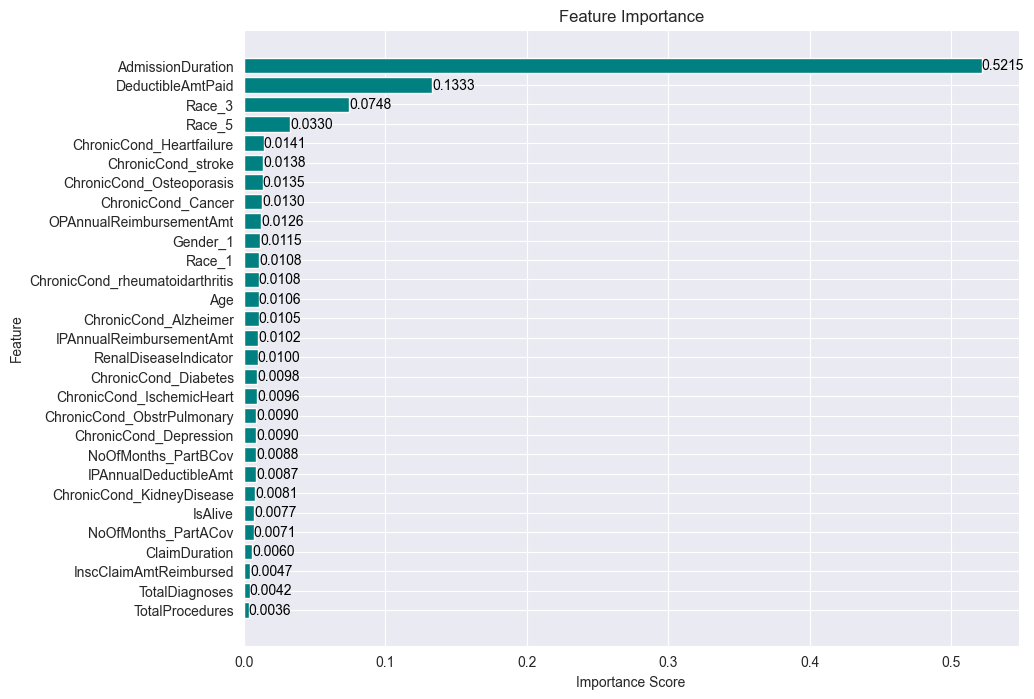

In [157]:
show_feature_importance(xgb)

In [158]:
# Membuat DataFrame untuk menampung feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})

# Mengurutkan feature importance secara menurun
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
22,AdmissionDuration,0.521495
1,DeductibleAmtPaid,0.133309
26,Race_3,0.074751
27,Race_5,0.033015
6,ChronicCond_Heartfailure,0.014129
15,ChronicCond_stroke,0.013766
13,ChronicCond_Osteoporasis,0.013454
8,ChronicCond_Cancer,0.012993
18,OPAnnualReimbursementAmt,0.012583
28,Gender_1,0.011520


Insight dari hasil pemodelan:

Fitur "InscClaimAmtReimbursed" memiliki tingkat penting yang tinggi, yang menunjukkan bahwa jumlah klaim yang diajukan merupakan faktor yang signifikan dalam memprediksi kecurangan. Dalam hal ini, langkah-langkah yang dapat diambil adalah:
Menerapkan mekanisme validasi dan verifikasi yang ketat untuk jumlah klaim yang tinggi atau tidak wajar.
Melakukan peninjauan ulang secara intensif pada klaim dengan jumlah klaim yang mencurigakan.
Fitur "IPAnnualDeductibleAmt" dan "DeductibleAmtPaid" juga memiliki tingkat penting yang signifikan. Hal ini menunjukkan bahwa jumlah potongan dan biaya yang dibayarkan oleh peserta asuransi juga dapat menjadi faktor yang mempengaruhi kemungkinan terjadinya kecurangan. Tindakan yang dapat diambil adalah:
Memperkuat kontrol dan validasi pada proses penagihan potongan dan biaya yang dibayarkan oleh peserta asuransi.
Memantau dan menganalisis tren pembayaran potongan dan biaya untuk mendeteksi pola yang mencurigakan.

In [169]:
fraud_data = data_pre4[data_pre4['PotentialFraud'] == 1]
total_reimbursement_loss = fraud_data['TotalReimbursement'].sum()
total_charge_loss = fraud_data['TotalCharge'].sum()
total_loss = total_reimbursement_loss + total_charge_loss

print(total_reimbursement_loss, total_charge_loss)
print("Total Kerugian: Rp",total_loss)


1989666550 451851083.0
Total Kerugian: Rp 2441517633.0


In [170]:
total_reimbursement_claim = data_pre4['TotalReimbursement'].sum()
total_charge_claim = data_pre4['TotalCharge'].sum()
total_claimed = total_reimbursement_claim + total_charge_claim

print(total_reimbursement_claim, total_charge_claim)
print("Total Claim: Rp",total_claimed)

4696016800 913301776.0
Total Claim: Rp 5609318576.0


In [167]:
loss_ratio = total_loss/total_claimed
print(loss_ratio)

0.4352610036174918
